# Pandas
-----
## 04. 데이터 그룹화 및 집계
### EDA (Exploratory Data Analysis)
   - 데이터를 이해하기 위한 탐색적 분석
   - 데이터의 특징과 내재하는 구조적 관계를 알아내는 과정
   - CDA (Confirmatory Data Analysis)와 대비되는 방법론
### 데이터그룹화
   - 데이터를 특정 기준에 따라 논리적으로 나누는 작업
   - 특정 열의 값이 동일한 행들을 하나의 그룹으로 묶음
   - groupby() 메서드를 사용하여 그룹화 수행
   - 그룹화 후 각 그룹에 대해 집계 함수를 적용하여 요약 통계 정보 계산 가능
   - 멀티 인덱스를 사용하여 여러 기준에 따라 복수 개의 열을 기준으로 그룹화 가능
   - 그룹화를 통해 원하는 데이터를 필터링하거나 변환할 수 있음

In [1]:
import pandas as pd

# gapminder.tsv 파일을 읽어서 데이터프레임으로 변환
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df

# 불러온 데이터프레임의 앞쪽 데이터를 확인
# df.head()
# df.head(10)
df.head(n=10)

# 불러온 데이터프레임의 뒤쪽 데이터를 확인
df.tail()

# 데이터프레임의 형태 확인
df.shape

# 데이터프레임에 포함된 컬럼 이름 확인
df.columns

# 각 컬럼의 자료형 확인
df.dtypes

# 데이터프레임의 전반적 정보 확인
df.info()

# 데이터프레임의 기술 통계 정보 확인
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [2]:
# year 열을 기준으로 데이터 그룹화, 연도별 groupby 객체 생성
grouped_year_df = df.groupby('year')
# grouped_year_df.head()
# type(grouped_year_df)
# 그룹화한 데이터프레임의 기술 통계 정보 확인
# df.describe()
grouped_year_df.describe()

lifeExp                                                             \
       count       mean        std     min       25%      50%       75%   
year                                                                      
1952   142.0  49.057620  12.225956  28.801  39.05900  45.1355  59.76500   
1957   142.0  51.507401  12.231286  30.332  41.24750  48.3605  63.03675   
1962   142.0  53.609249  12.097245  31.997  43.46850  50.8810  65.23450   
1967   142.0  55.678290  11.718858  34.020  46.03375  53.8250  67.41950   
1972   142.0  57.647386  11.381953  35.400  48.50025  56.5300  69.24750   
1977   142.0  59.570157  11.227229  31.220  50.47550  59.6720  70.38250   
1982   142.0  61.533197  10.770618  38.445  52.94000  62.4415  70.92125   
1987   142.0  63.212613  10.556285  39.906  54.94075  65.8340  71.87725   
1992   142.0  64.160338  11.227380  23.599  56.12175  67.7030  72.58250   
1997   142.0  65.014676  11.559439  36.087  55.63375  69.3940  74.16975   
2002   142.0  65.694923  12.279823  39.193  55.52225  70.8255  75.45925   
2007   142.0  67.007423  12.073021  39.613  57.16025  71.9355  76.41325   

                pop                ...                            gdpPercap  \
         max  count          mean  ...          75%           max     count   
year                               ...                                        
1952  72.670  142.0  1.695040e+07  ...   9168197.75  5.562635e+08     142.0   
1957  73.470  142.0  1.876341e+07  ...   9817598.00  6.374080e+08     142.0   
1962  73.680  142.0  2.042101e+07  ...  10980084.50  6.657700e+08     142.0   
1967  74.160  142.0  2.265830e+07  ...  12614584.75  7.545500e+08     142.0   
1972  74.720  142.0  2.518998e+07  ...  14679199.50  8.620300e+08     142.0   
1977  76.110  142.0  2.767638e+07  ...  16670227.00  9.434550e+08     142.0   
1982  77.110  142.0  3.020730e+07  ...  18407324.75  1.000281e+09     142.0   
1987  78.670  142.0  3.303857e+07  ...  20947542.50  1.084035e+09     142.0   
1992  79.360  142.0  3.599092e+07  ...  22705382.50  1.164970e+09     142.0   
1997  80.690  142.0  3.883947e+07  ...  24311369.75  1.230075e+09     142.0   
2002  82.000  142.0  4.145759e+07  ...  26545556.25  1.280400e+09     142.0   
2007  82.603  142.0  4.402122e+07  ...  31210041.75  1.318683e+09     142.0   

                                                                        \
              mean           std         min          25%          50%   
year                                                                     
1952   3725.276046   9321.064786  298.846212   864.752389  1968.528344   
1957   4299.408345   9869.662202  335.997115   930.540819  2173.220291   
1962   4725.812342   8667.362525  355.203227  1059.149171  2335.439533   
1967   5483.653047   8095.315431  349.000000  1151.245103  2678.334740   
1972   6770.082815  10614.383403  357.000000  1257.193853  3339.129407   
1977   7313.166421   8362.489150  371.000000  1357.257252  3798.609244   
1982   7518.901673   7733.845006  424.000000  1363.338985  4216.228428   
1987   7900.920218   8288.281304  385.000000  1327.469823  4280.300366   
1992   8158.608521   9031.846080  347.000000  1270.660958  4386.085502   
1997   9090.175363  10171.493263  312.188423  1366.837958  4781.825478   
2002   9917.848365  11154.114865  241.165876  1409.567264  5319.804524   
2007  11680.071820  12859.937337  277.551859  1624.842248  6124.371108   

                                  
               75%           max  
year                              
1952   3913.492777  108382.35290  
1957   4876.356362  113523.13290  
1962   5709.381428   95458.11176  
1967   7075.932943   80894.88326  
1972   9508.839304  109347.86700  
1977  11204.102423   59265.47714  
1982  12347.953722   33693.17525  
1987  11994.052795   31540.97480  
1992  10684.351870   34932.91959  
1997  12022.867188   41283.16433  
2002  13359.512258   44683.97525  
2007  18008.835640   49357.19017  

[12 rows x 24 columns]

In [3]:
# 그룹화한 데이터프레임에서 lifeExp 열만 추출하여 평균값 계산
grouped_year_df['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

### 데이터프레임의 시각화
   - 데이터의 시각화는 데이터를 이해하는 데 매우 중요한 단계
   - 데이터프레임의 plot() 메서드를 사용하여 그래프 생성 가능
      - 다양한 종류의 그래프를 지원
        - 선 그래프, 막대 그래프, 히스토그램, 산점도 등
      - 내부적으로 Matplotlib를 사용하여 데이터를 그래프로 그려줌

#### plot 메서드의 주요 매개변수
- 기본 설정 및 데이터 지정
    - kind : 그래프 유형 지정 (예: 'line', 'bar', 'scatter' 등)
    - x : x축에 사용할 데이터 열 이름 또는 값
    - y : y축에 사용할 데이터 열 이름 또는 값
- 그래프 레이블 관련
    - title : 그래프 제목을 설정
    - xlabel : x축의 레이블을 설정
    - ylabel : y축의 레이블을 설정
    - xlim : x 축의 범위를 지정 (예: [xmin, xmax])
    - ylim : y 축의 범위를 지정 (예: [ymin, ymax])
    - grid : 축의 그리드를 표시할 지 여부를 지정 (기본값: False)
    - legend : 범례를 그릴 지 여부를 지정 (기본값: False)
    - color : 그래프의 색상을 지정 (기본값: 라인 플롯: None, 막대 그래프: 'b')
    - style : 라인 플롯 스타일을 지정 (예: 'o-', '--', 's-', 'k:')
    - subplots : 각 열을 개별 서브플롯으로 그릴지 여부를 지정합니다.

<Axes: title={'center': 'Life Expectancy Trends (By Year)'}, xlabel='Year', ylabel='Life Expectancy'>

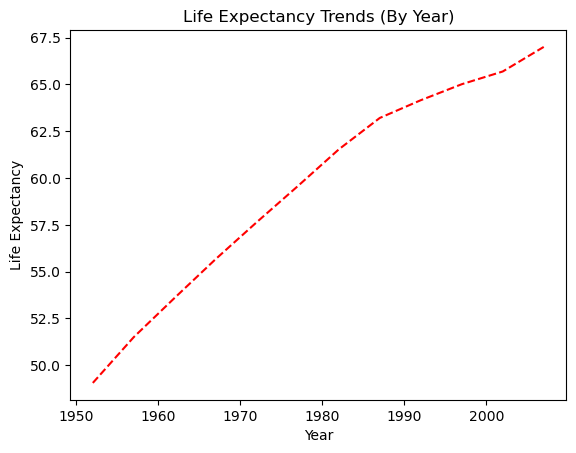

In [4]:
%matplotlib inline
life_exp_df = grouped_year_df['lifeExp'].mean()
# life_exp_df.plot()
life_exp_df.plot(kind='line',
                 x='year',
                 y='lifeExp',
                 title='Life Expectancy Trends (By Year)',
                 xlabel='Year',
                 ylabel='Life Expectancy',
                 color='red',
                 style="--",)

#### [연습]
- gapminder 데이터셋을 이용, 연도별, 대륙별 그룹화 수행
- 그룹화된 데이터셋에서 gdpPercap 열만 추출하여 gdpPerCap의 평균값을 계산
- Plot으로 출력 

In [5]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('../data/gapminder.tsv', sep='\t')

grouped_df = df.groupby(["year", "continent"])
# grouped_df.describe()
gdp_summary = grouped_df['gdpPercap'].mean()
gdp_summary

year  continent
1952  Africa        1252.572466
      Americas      4079.062552
      Asia          5195.484004
      Europe        5661.057435
      Oceania      10298.085650
1957  Africa        1385.236062
      Americas      4616.043733
      Asia          5787.732940
      Europe        6963.012816
      Oceania      11598.522455
1962  Africa        1598.078825
      Americas      4901.541870
      Asia          5729.369625
      Europe        8365.486814
      Oceania      12696.452430
1967  Africa        2050.363801
      Americas      5668.253496
      Asia          5971.173374
      Europe       10143.823757
      Oceania      14495.021790
1972  Africa        2339.615674
      Americas      6491.334139
      Asia          8187.468699
      Europe       12479.575246
      Oceania      16417.333380
1977  Africa        2585.938508
      Americas      7352.007126
      Asia          7791.314020
      Europe       14283.979110
      Oceania      17283.957605
1982  Africa        2481

In [6]:
gdp_summary.unstack()

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,1252.572466,4079.062552,5195.484004,5661.057435,10298.085650
1957,1385.236062,4616.043733,5787.732940,6963.012816,11598.522455
1962,1598.078825,4901.541870,5729.369625,8365.486814,12696.452430
1967,2050.363801,5668.253496,5971.173374,10143.823757,14495.021790
1972,2339.615674,6491.334139,8187.468699,12479.575246,16417.333380
1977,2585.938508,7352.007126,7791.314020,14283.979110,17283.957605
1982,2481.592960,7506.737088,7434.135157,15617.896551,18554.709840
1987,2282.668991,7793.400261,7608.226508,17214.310727,20448.040160
1992,2281.810333,8044.934406,8639.690248,17061.568084,20894.045885


<Axes: title={'center': 'GDP per Capita Trends (By Year)'}, xlabel='Year', ylabel='GDP per Capita'>

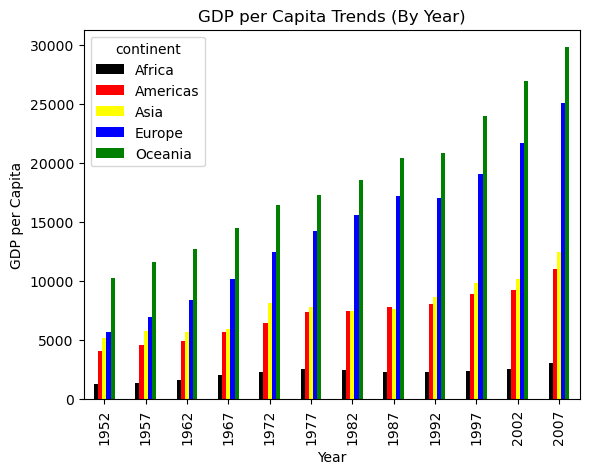

In [7]:
gdp_summary.unstack().plot(kind='bar',
                 # figsize=(10, 10),
                 title='GDP per Capita Trends (By Year)',
                 ylabel='GDP per Capita',
                 xlabel='Year',
                 color=['black', 'red', 'yellow', 'blue', 'green'],
                 legend=True)

### Pivot Table
#### 피봇 테이블 개요
- 데이터프레임의 데이터를 재구성하여 데이터에 대한 통계를 한눈에 파악할 수 있도록 정리한 표
- 데이터 분석과 정보 관리에서 중요한 도구
    - 엑셀 등 스프레드시트 프로그램에서 자주 사용
    - 대량의 데이터를 빠르게 정리하고 그룹화 할 수 있으며, 사용자의 필요에 따라 데이터를 분석하고 합계, 평균, 최대, 최소값 등을 계산할 수 있음
- 데이터를 효과적으로 정리하고 분석하는 데 있어 매우 강력한 도구로, 재무, 판매, 마케팅 등 다양한 분야에서 활용

#### 피봇 테이블의 주요 기능
1. 정렬과 그룹화: 특정 열 또는 행을 기준으로 데이터를 정렬하거나 그룹화하여 요약할 수 있음
2. 집계 함수 사용: SUM, AVERAGE, COUNT 등의 집계 함수를 사용하여 데이터를 요약할 수 있음
3. 데이터 필터링: 특정 조건을 적용하여 데이터를 필터링하고 분석할 수 있음
4. 드릴 다운 및 드릴 업: 데이터의 다른 레벨로 들어가 세부 정보를 확인하거나 요약된 정보로 돌아갈 수 있음

#### 피봇 테이블 작성 과정
1. 데이터 선택: 분석하고자 하는 데이터 범위를 선택합니다.
2. 피봇 테이블 생성: 대부분의 스프레드시트 프로그램에서는 특별한 메뉴 또는 버튼을 통해 피봇 테이블을 생성할 수 있습니다.
3. 행 및 열 선택: 특정 열을 행 또는 열에 배치하여 데이터를 그룹화합니다.
4. 값 및 집계 함수 선택: 특정 열의 값을 분석하고, 원하는 집계 함수를 선택합니다.
5. 필터 적용 (선택 사항): 원하는 조건에 맞게 데이터를 필터링할 수 있습니다.

### 피봇 테이블의 구성 요소
- 행 (또는 인덱스): 피봇 테이블의 왼쪽에 위치하며, 행에 있는 데이터를 기준으로 피봇 테이블의 데이터가 그룹화됨
- 열: 피봇 테이블의 위쪽에 위치하며, 열에 있는 데이터를 기준으로 피봇 테이블의 데이터가 그룹화됨
- 값: 집계 함수를 적용할 데이터
- 집계 함수: 데이터를 집계하는 데 사용되는 함수
- 필터 (선택사항): 원하는 조건에 맞게 데이터를 필터링할 수 있음

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os


plt.rcParams["font.family"] = 'NanumGothic'

df = pd.read_csv('../data/household_accounts.csv')
# df

# print(df["날짜"].dtype)
df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index("날짜", inplace=True)

# 피봇 테이블 생성
pivot_df = df.pivot_table(index='날짜', 
                          columns='카테고리', 
                          values='금액', 
                          aggfunc='sum',
                          fill_value=0)  # 존재하지 않는 값은 0으로 지정

pivot_df

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,보험료,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비
날짜,,,,,,,,,,,,,,,,,,,,
2023-01-01,0,0,0,29800,0,114600,97300,0,0,0,0,0,0,0,0,84900,0,0,0,0
2023-01-02,0,0,0,0,4300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-03,0,0,0,0,0,135600,0,0,0,64400,0,0,0,0,0,0,290200,23600,0,0
2023-01-04,48200,0,61900,0,0,0,0,0,0,0,0,85700,0,0,48900,0,0,9000,0,0
2023-01-05,0,0,71000,0,0,0,0,0,0,49100,255500,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0,0,79500,29700,0,0,59400,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-27,0,0,0,0,0,114900,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23800,0,0,0,0,0


In [9]:
pivot_df_monthly = pivot_df.resample('M').sum()
pivot_df_monthly.index = pivot_df_monthly.index.to_period('M')
pivot_df_monthly

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,보험료,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비
날짜,,,,,,,,,,,,,,,,,,,,
2023-01,262500,309300,626900,238700,15700,327800,314300,27900,205500,615800,255500,537200,147400,1771500,250900,293500,956500,267800,65100,18600
2023-02,208200,309300,415800,185200,10600,132900,127500,27900,193100,367100,255500,472100,488200,0,161500,110200,1354600,289500,65100,18600
2023-03,251900,309300,701400,185200,13200,745700,235600,27900,315100,725100,255500,663400,489100,0,224900,389100,532900,370800,65100,18600
2023-04,107800,309300,461300,47100,16000,786400,303100,27900,75900,816100,255500,189700,702500,1223600,28600,206600,1139900,325100,65100,18600
2023-05,330800,309300,335500,83000,13100,579400,365400,27900,550200,479000,255500,364500,412200,0,95000,329400,829600,290900,65100,18600
2023-06,323100,309300,346200,175200,12500,466900,355500,27900,115700,661900,255500,318100,513900,0,209100,248200,1009100,246400,65100,18600


<Axes: title={'center': '월별 지출 현황'}, xlabel='월', ylabel='지출액'>

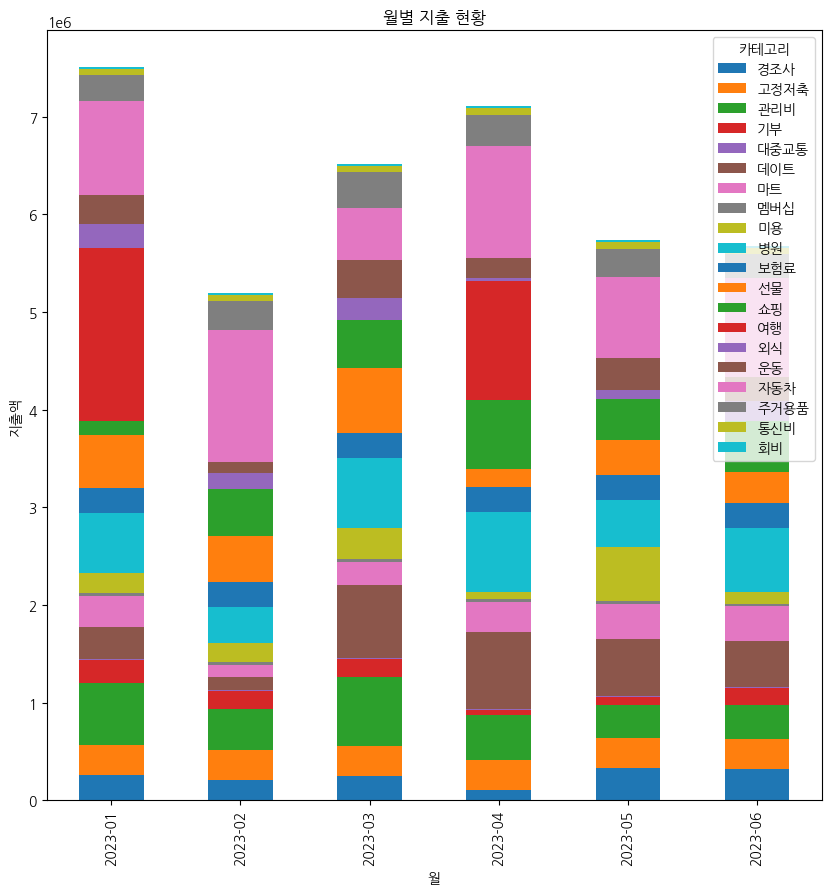

In [10]:
pivot_df_monthly.plot(kind='bar',
                      stacked=True,
                      figsize=(10, 10),
                      title='월별 지출 현황',
                      xlabel='월',
                      ylabel='지출액',
                      legend=True)

In [11]:
# 카테고리 취합, 달 취합 속성을 각각 추가
pivot_df_monthly['Total'] = pivot_df_monthly.sum(axis=1)
pivot_df_monthly.loc['Total'] = pivot_df_monthly.sum(axis=0)

pivot_df_monthly

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,...,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비,Total
날짜,,,,,,,,,,,,,,,,,,,,,
2023-01,262500,309300,626900,238700,15700,327800,314300,27900,205500,615800,...,537200,147400,1771500,250900,293500,956500,267800,65100,18600,7508400
2023-02,208200,309300,415800,185200,10600,132900,127500,27900,193100,367100,...,472100,488200,0,161500,110200,1354600,289500,65100,18600,5192900
2023-03,251900,309300,701400,185200,13200,745700,235600,27900,315100,725100,...,663400,489100,0,224900,389100,532900,370800,65100,18600,6519800
2023-04,107800,309300,461300,47100,16000,786400,303100,27900,75900,816100,...,189700,702500,1223600,28600,206600,1139900,325100,65100,18600,7106100
2023-05,330800,309300,335500,83000,13100,579400,365400,27900,550200,479000,...,364500,412200,0,95000,329400,829600,290900,65100,18600,5734400
2023-06,323100,309300,346200,175200,12500,466900,355500,27900,115700,661900,...,318100,513900,0,209100,248200,1009100,246400,65100,18600,5678200
Total,1484300,1855800,2887100,914400,81100,3039100,1701400,167400,1455500,3665000,...,2545000,2753300,2995100,970000,1577000,5822600,1790500,390600,111600,37739800


In [12]:
# 데이터를 generated 폴더에 저장
if not os.path.exists('../generated'):
    os.mkdir('../generated')
pivot_df_monthly.to_csv('../generated/pivot_table.csv', encoding='utf-8')